# Visualization and Machine Learning Model Creation Using Scikit Learn KNN Classifier

##### Importing Dependencies.

In [1]:
# For Data Visualization
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
# For Linear Algebra
import numpy as np
# For Dataframe creation
import pandas as pd
# For Machine Learning Model Creation
from sklearn import preprocessing, datasets, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

##### Loading Dataset.

In [2]:
# Loading Dataset from Sklearn.datasets
iris=datasets.load_iris()

##### Iris data set from sklearn.datasets is in dictionary structure, therefore the data and targets can be called by the Keys "data" and "target" as in the next step.

In [3]:
X, y= iris["data"], iris["target"]

In [27]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

##### In order to train a machine learning model the dataset must have to be splitted in train and test set as in the next step.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

##### Normalize the features both train and test.

In [5]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##### Machine learning model creation using K nearest Neighbor Classifier.

In [6]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

##### Predict test data from the model.

In [7]:
y_pred = knn.predict(X_test)

##### Accuracy Calculation of the model.

In [8]:
acc=accuracy_score(y_test, y_pred)
print("The accuracy of the model is {x:.2f}%".format(x=acc*100))

The accuracy of the model is 89.47%


##### Model Visualization.

C:\Users\HP\.conda\envs\tf_2_10\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


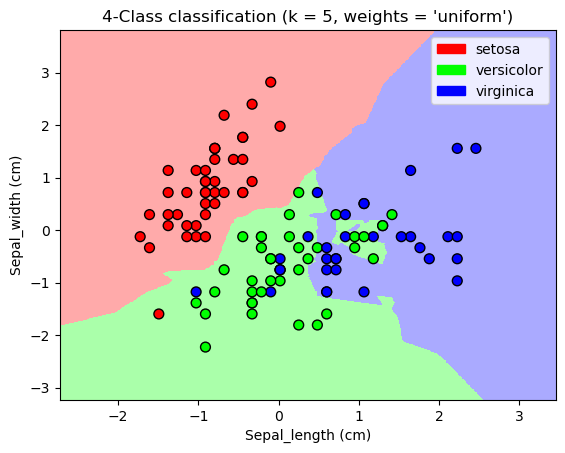

In [22]:
def plot_iris_knn(X, y, n_neighbors, weights):
    X_mat = X[["Sepal_length","Sepal_width"]].values
    y_mat = y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y_mat, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='setosa')
    patch1 = mpatches.Patch(color='#00FF00', label='versicolor')
    patch2 = mpatches.Patch(color='#0000FF', label='virginica')
    plt.legend(handles=[patch0, patch1, patch2])
    plt.xlabel('Sepal_length (cm)')
    plt.ylabel('Sepal_width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))    
plot_iris_knn(X_train, y_train, 5, 'uniform')

C:\Users\HP\.conda\envs\tf_2_10\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


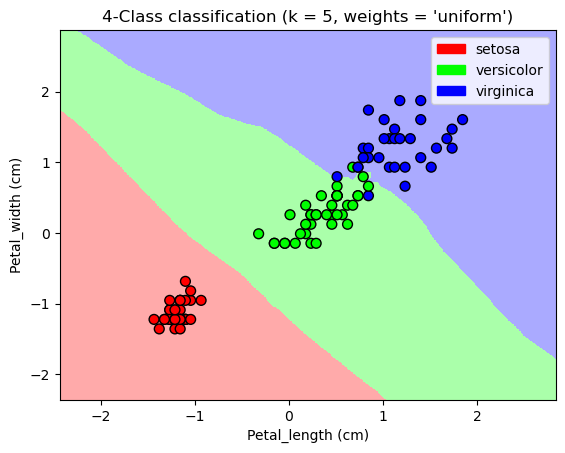

In [35]:
def plot_iris_knn(X, y, n_neighbors, weights):
    X_mat = X[["Petal_length","Petal_width"]].values
    y_mat = y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y_mat, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='setosa')
    patch1 = mpatches.Patch(color='#00FF00', label='versicolor')
    patch2 = mpatches.Patch(color='#0000FF', label='virginica')
    plt.legend(handles=[patch0, patch1, patch2])
    plt.xlabel('Petal_length (cm)')
    plt.ylabel('Petal_width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))    
plot_iris_knn(X_train, y_train, 5, 'uniform')